In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree as kd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
X = datasets.load_iris()
X = X.data[:,:2]

In [11]:
def parameters(X,n_gaussians):
  n,features   = X.shape
  kmeans = KMeans(n_clusters=n_gaussians).fit(X)
  means = kmeans.cluster_centers_
  etiquetas = kmeans.labels_
  mixing_coefficients = np.zeros(n_gaussians)
  covariance = np.zeros((n_gaussians, features, features))
  for i in range(n_gaussians):
      X_i = X[etiquetas == i]
      mixing_coefficients[i] = len(X_i) / n
      covariance[i] = np.cov(X_i.T)
  return mixing_coefficients, means, covariance

mixing_coefficients, means, covariance = parameters(X,3)

/Users/fabriziovasquez/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
def E(X,mixing_coefficients,means,covarianzas):
    n_samples = X.shape[0]
    n_gaussians = len(mixing_coefficients)
    log_responsabilidades = np.zeros((n_samples, n_gaussians))
    for j in range(n_gaussians):
        log_responsabilidades[:, j] = np.log(mixing_coefficients[j]) + multivariate_normal.logpdf(X, mean=means[j], cov=covarianzas[j])
    log_responsabilidades -= log_responsabilidades.max(axis=1, keepdims=True)
    responsabilidades = np.exp(log_responsabilidades)
    responsabilidades /= responsabilidades.sum(axis=1, keepdims=True)
    return responsabilidades

responsability= E(X,mixing_coefficients,means,covariance)

In [14]:
def M(X,responsability):
    n_samples, features = X.shape
    n_componentes = responsability.shape[1]
    pi = responsability.sum(axis=0) / n_samples
    medias = np.dot(responsability.T, X) / responsability.sum(axis=0)[:, np.newaxis]
    covarianzas = np.zeros((n_componentes, features, features))
    for j in range(n_componentes):
        diff = X - medias[j]
        covarianzas[j] = np.dot(responsability[:, j] * diff.T, diff) / responsability[:, j].sum()
    return pi, medias, covarianzas
  
M(X,responsability)

(array([0.35613952, 0.33025827, 0.31360221]),
 array([[5.80210382, 2.70205258],
        [5.00816903, 3.43371011],
        [6.76967685, 3.06443779]]),
 array([[[0.17684114, 0.0437848 ],
         [0.0437848 , 0.08263803]],
 
        [[0.12108518, 0.09477281],
         [0.09477281, 0.13602745]],
 
        [[0.24899843, 0.02387572],
         [0.02387572, 0.07208011]]]))

In [24]:
def train_GMM(X,n_gaussians,iterations=10):
    coeff,means,covarianzas = parameters(X,3)
    for i in range(n_gaussians):
        value = E(X,coeff,means,covarianzas)
        coeff,means,covarianzas = M(X,value)
    return coeff,means,covarianzas

coeff,means,covarianzas = train_GMM(X,2,1000)

/Users/fabriziovasquez/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0.36069778, 0.31173529, 0.32756693]),
 array([[5.81895797, 2.70715371],
        [6.74547739, 3.05803908],
        [5.01163153, 3.44225927]]),
 array([[[0.20646488, 0.05544839],
         [0.05544839, 0.08543423]],
 
        [[0.27822403, 0.03024171],
         [0.03024171, 0.07471188]],
 
        [[0.12030201, 0.09162255],
         [0.09162255, 0.12773175]]]))

/Users/fabriziovasquez/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


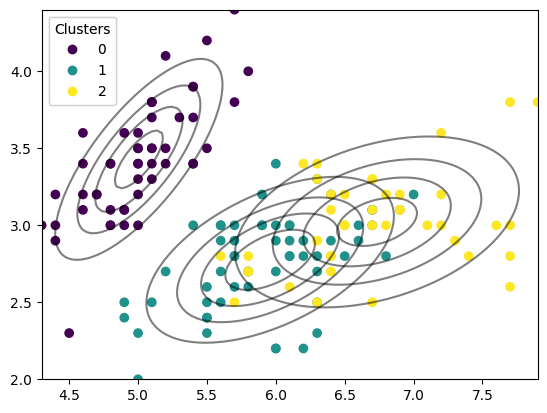

In [35]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

# Cargamos el dataset de iris
data = datasets.load_iris()
X = data.data

# Entrenamos el GMM
pesos, medias, covarianzas = train_GMM(X, 3)

# Elegimos dos características para visualizar (por ejemplo, las dos primeras)
X_plot = X[:, :2]

# Predicción de las etiquetas de cluster para cada punto
responsabilidades = E(X, pesos, medias, covarianzas)
etiquetas_predichas = np.argmax(responsabilidades, axis=1)

# Creación de una cuadrícula de valores para evaluar las distribuciones
x = np.linspace(X_plot[:,0].min(), X_plot[:,0].max(), 100)
y = np.linspace(X_plot[:,1].min(), X_plot[:,1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)
pos = np.dstack((X_grid, Y_grid))

fig, ax = plt.subplots()

# Dibujo de los contornos de las distribuciones
for i in range(3):
    rv = multivariate_normal(medias[i, :2], covarianzas[i, :2, :2])
    ax.contour(X_grid, Y_grid, rv.pdf(pos), levels=5, colors='k', alpha=0.5)

# Dibujo de los puntos de datos
scatter = ax.scatter(X_plot[:, 0], X_plot[:, 1], c=etiquetas_predichas, cmap='viridis')

# Agregando una leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [ ]:
# pagina adicinal para ver los anexos.

In [ ]:

"""
path ="./asd/img"
arr =[]
for i range(1:10):
    df = read(f{'kajsnd{i}.jgp'})
    arr.append(df)
"""
